In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')

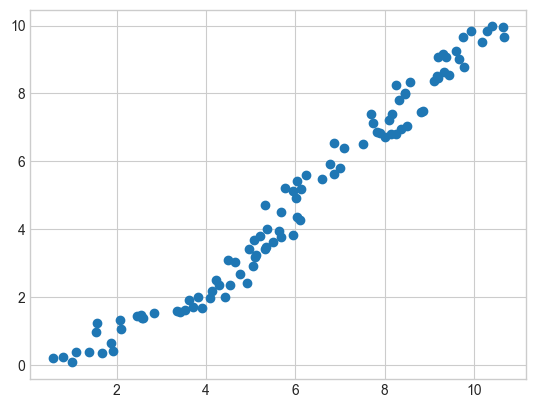

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

noise = np.random.rand(100,1)
X = sorted(10 * np.random.rand(100,1)) + noise
y = sorted(10 * np.random.rand(100))


plt.scatter(X,y)


In [4]:
X_train , X_test , y_train , y_test =train_test_split(X,y,test_size=0.2)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [5]:
print(f'선형 회귀 가중치 {model.coef_}')
print(f'선형 회귀 편향 {model.intercept_}')

선형 회귀 가중치 [1.08648506]
선형 회귀 편향 -1.6380841047302592


In [6]:
print(f"학습 데이터 점수 :{model.score(X_train,y_train)}")
print(f'평가 데이터 점수 :{model.score(X_test,y_test)}')

학습 데이터 점수 :0.9681061981301344
평가 데이터 점수 :0.9369082424288419


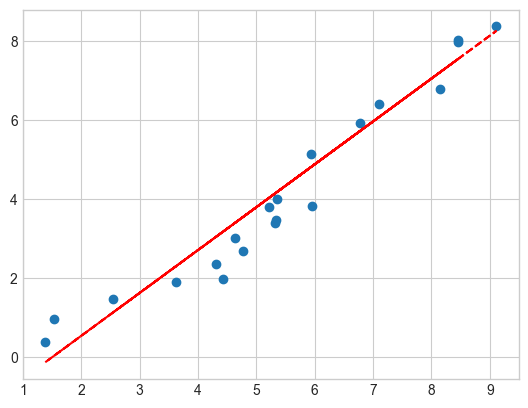

In [7]:
predict = model.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test,predict,'--r')

보스턴 주택 가격 데이터

In [5]:
from sklearn import datasets

X, y = datasets.fetch_openml('boston', return_X_y=True)

boston_df = pd.DataFrame(X)


C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\datasets\_openml.py:322: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [9]:
boston_df['MEDV'] = y
boston_df.head()

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [10]:
boston_df.describe()

CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         TAX     PTRATIO           B       LSTAT        MEDV  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043  408.237154   18.455534  356.674032   12.653063   22.532806  
std      2.105710  168.537116    2.164946   91.294864    7.141062    9.197104  
min      1.129600  187.000000   12.600000    0.320000    1.730000    5.000000  
25%      2.100175  279.000000   17.400000  375.377500    6.950000   17.025000  
50%      3.207450  330.000000   19.050000  391.440000   11.360000   21.200000  
75%      5.188425  666.000000   20.200000  396.225000   16.955000   25.000000  
max     12.126500  711.000000   22.000000  396.900000   37.970000   50.000000

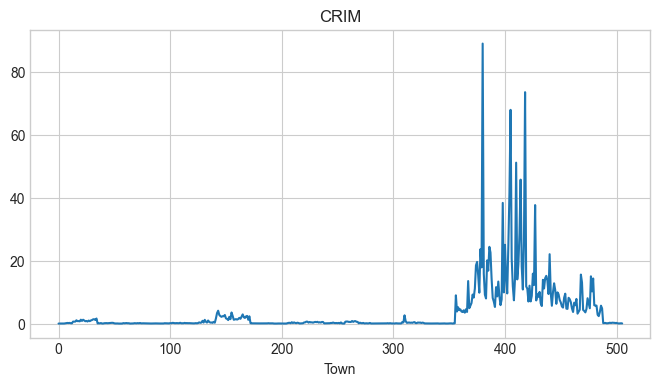

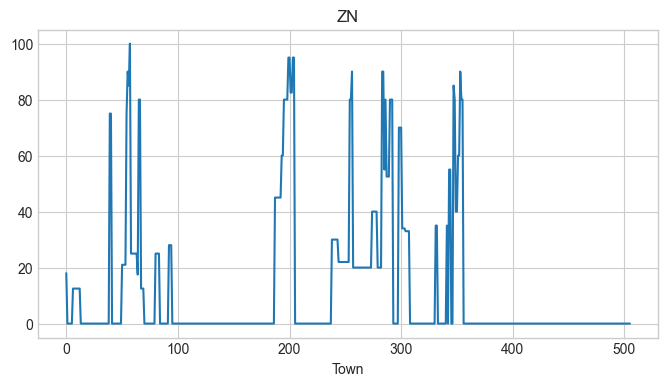

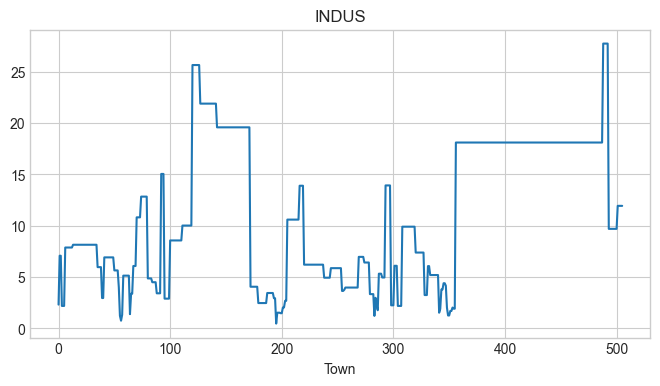

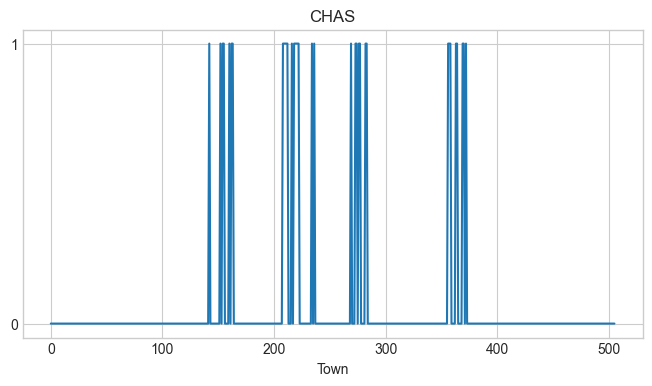

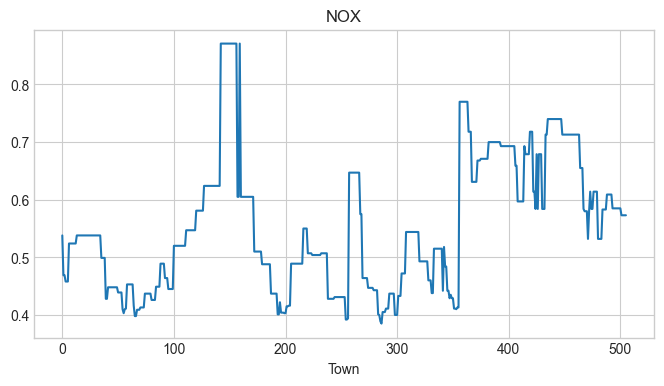

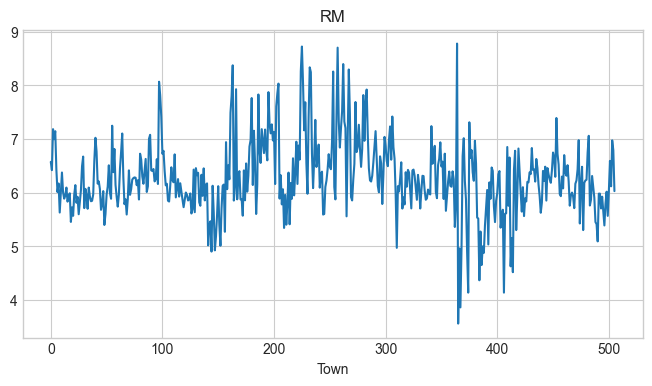

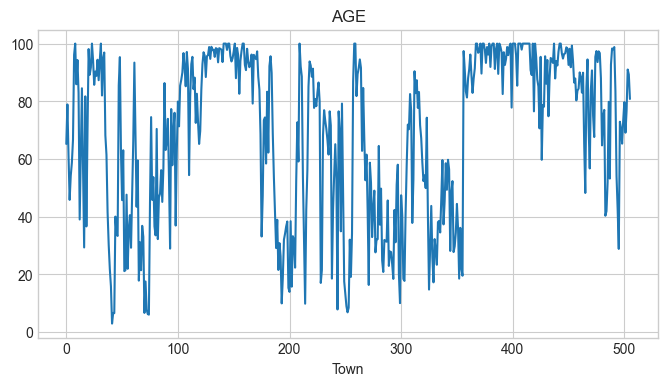

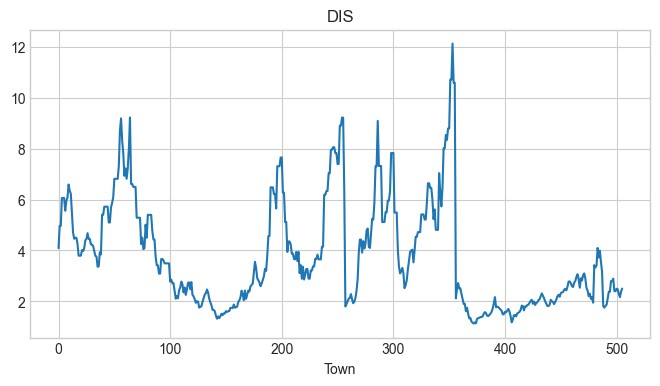

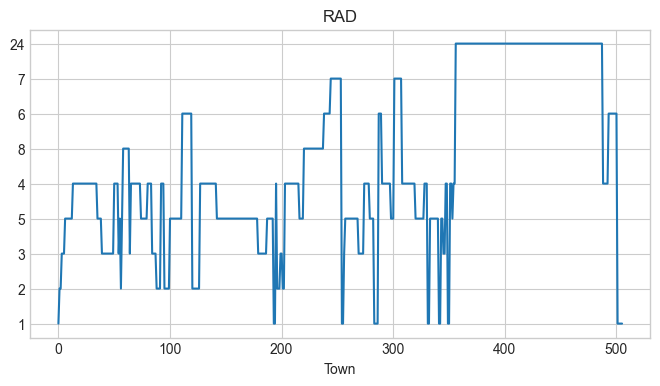

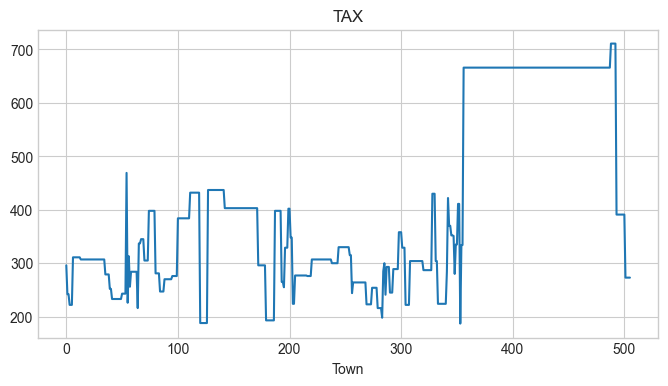

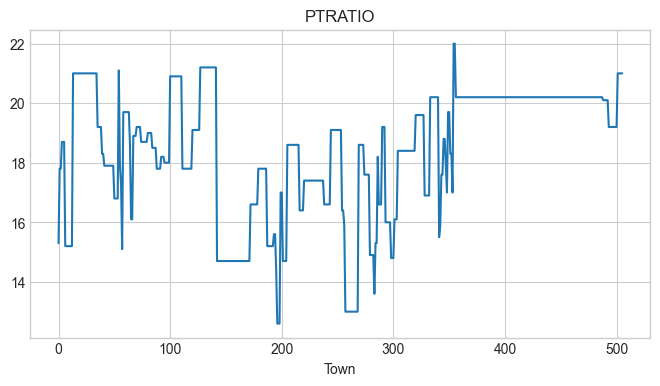

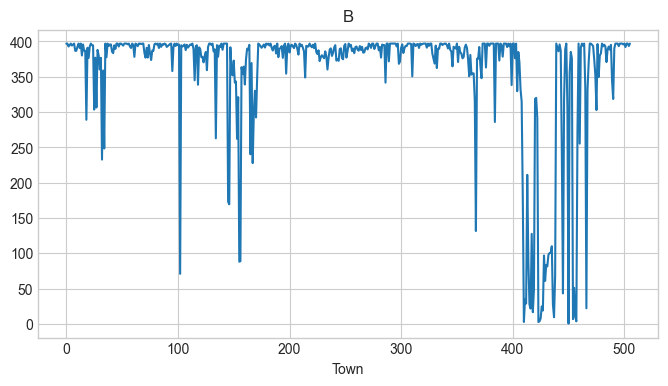

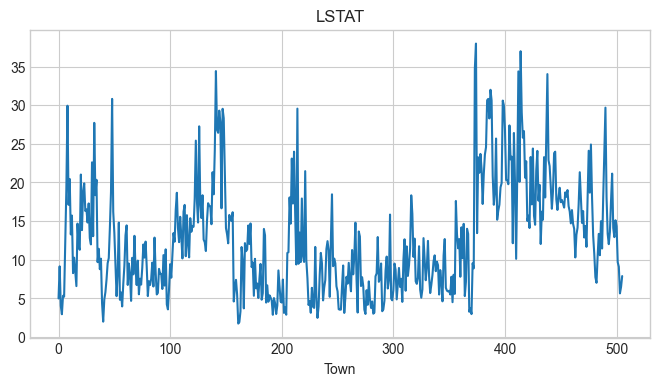

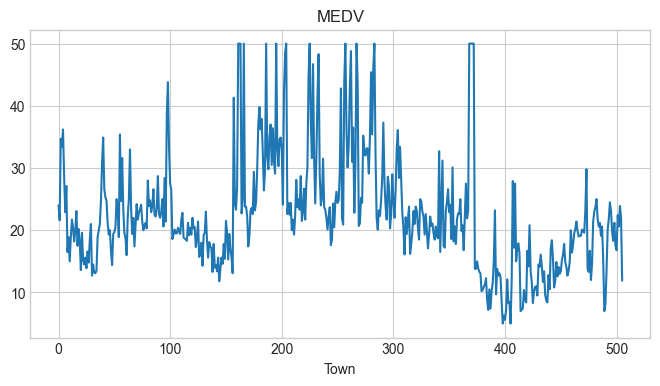

In [11]:
for i,col in enumerate(boston_df.columns) :
    plt.figure(figsize=(8,4))
    plt.plot(boston_df[col])
    plt.title(col)
    plt.xlabel('Town')

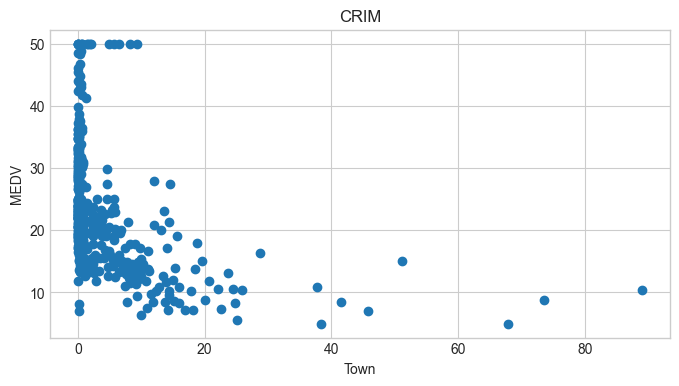

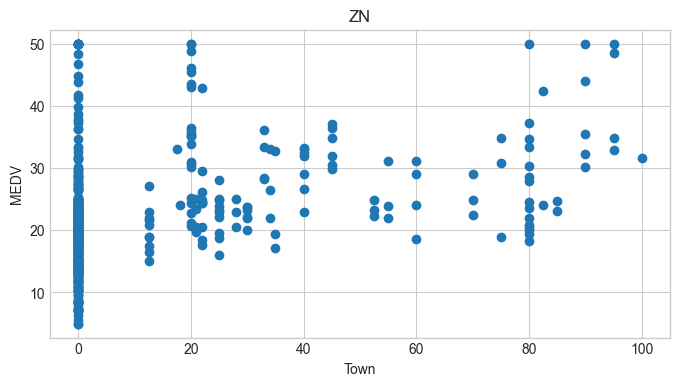

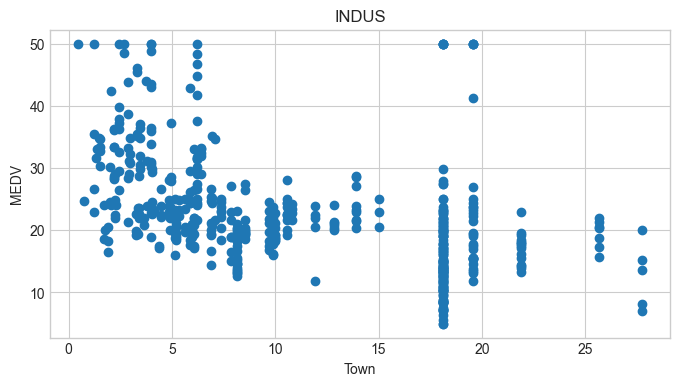

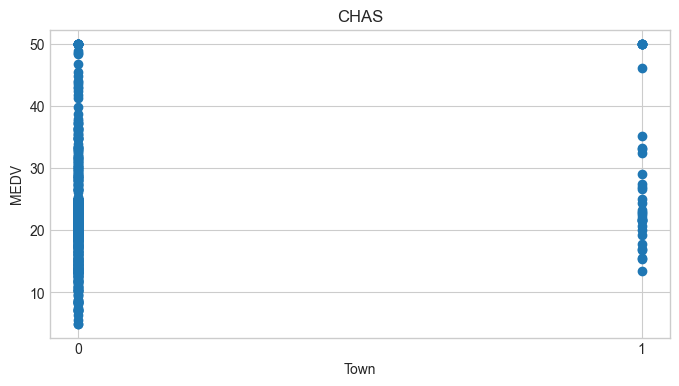

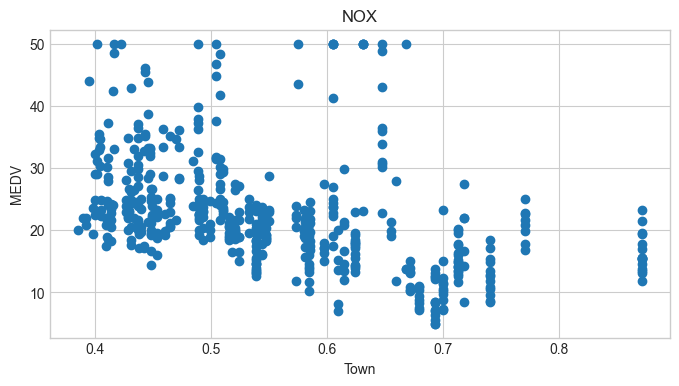

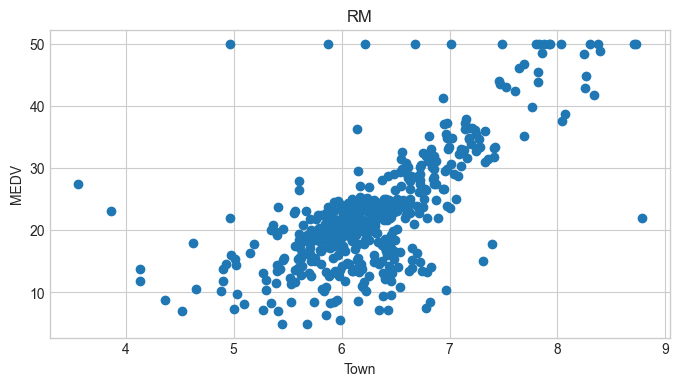

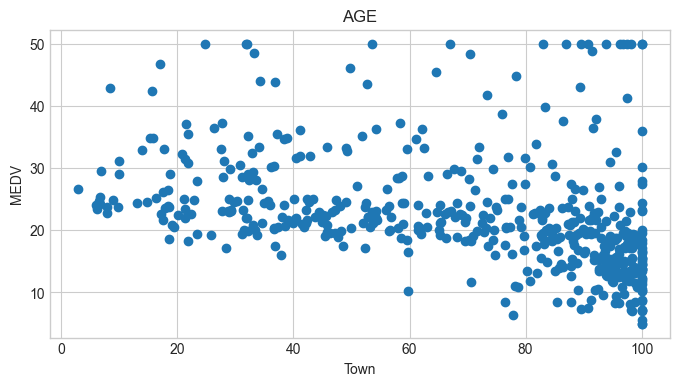

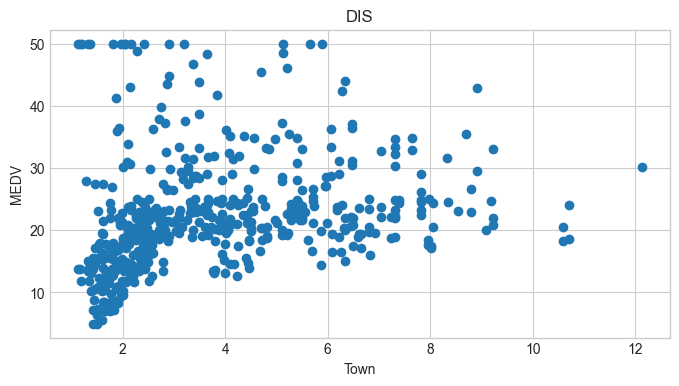

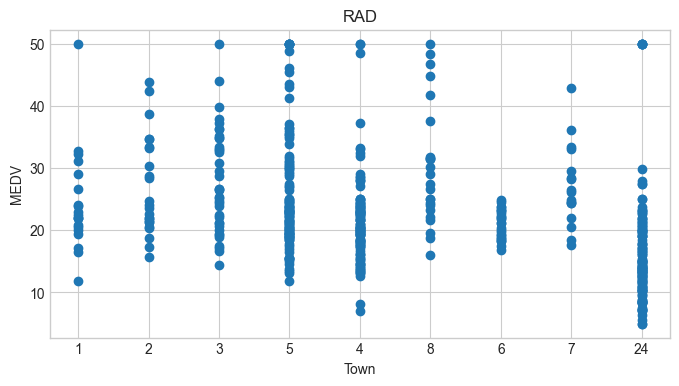

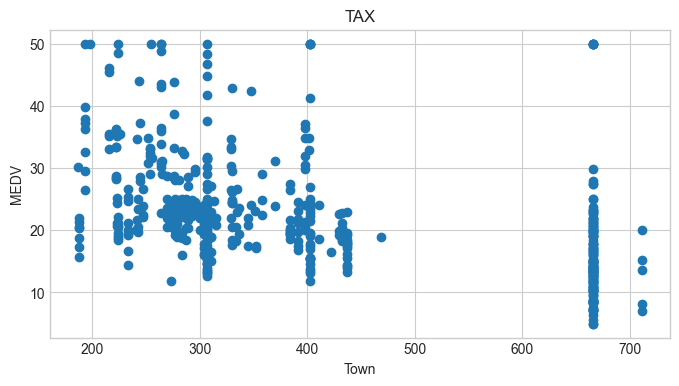

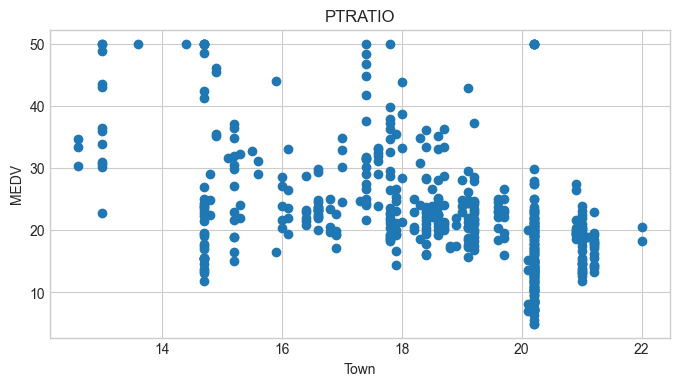

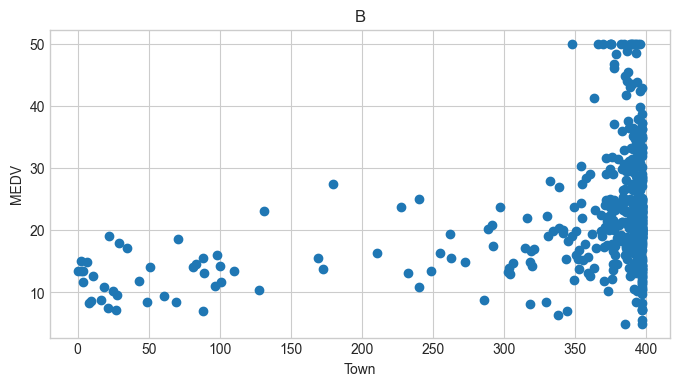

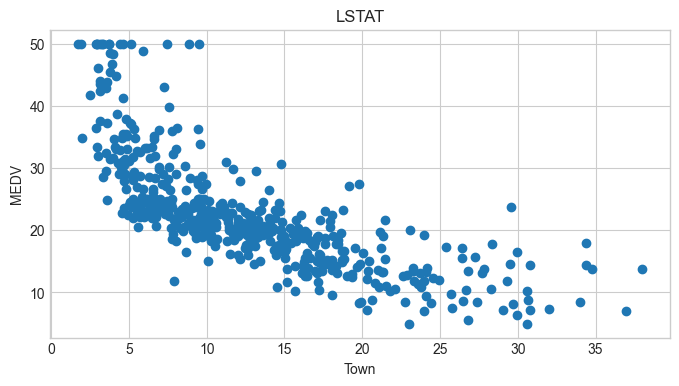

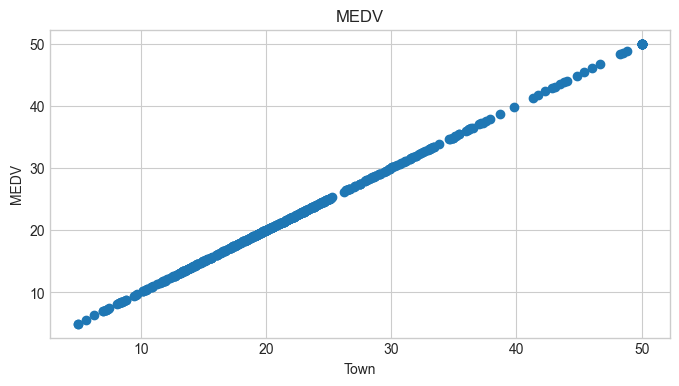

In [12]:
for i,col in enumerate(boston_df.columns) :
    plt.figure(figsize=(8,4))
    plt.scatter(boston_df[col],boston_df['MEDV'])
    plt.title(col)
    plt.xlabel('Town')
    plt.ylabel('MEDV')

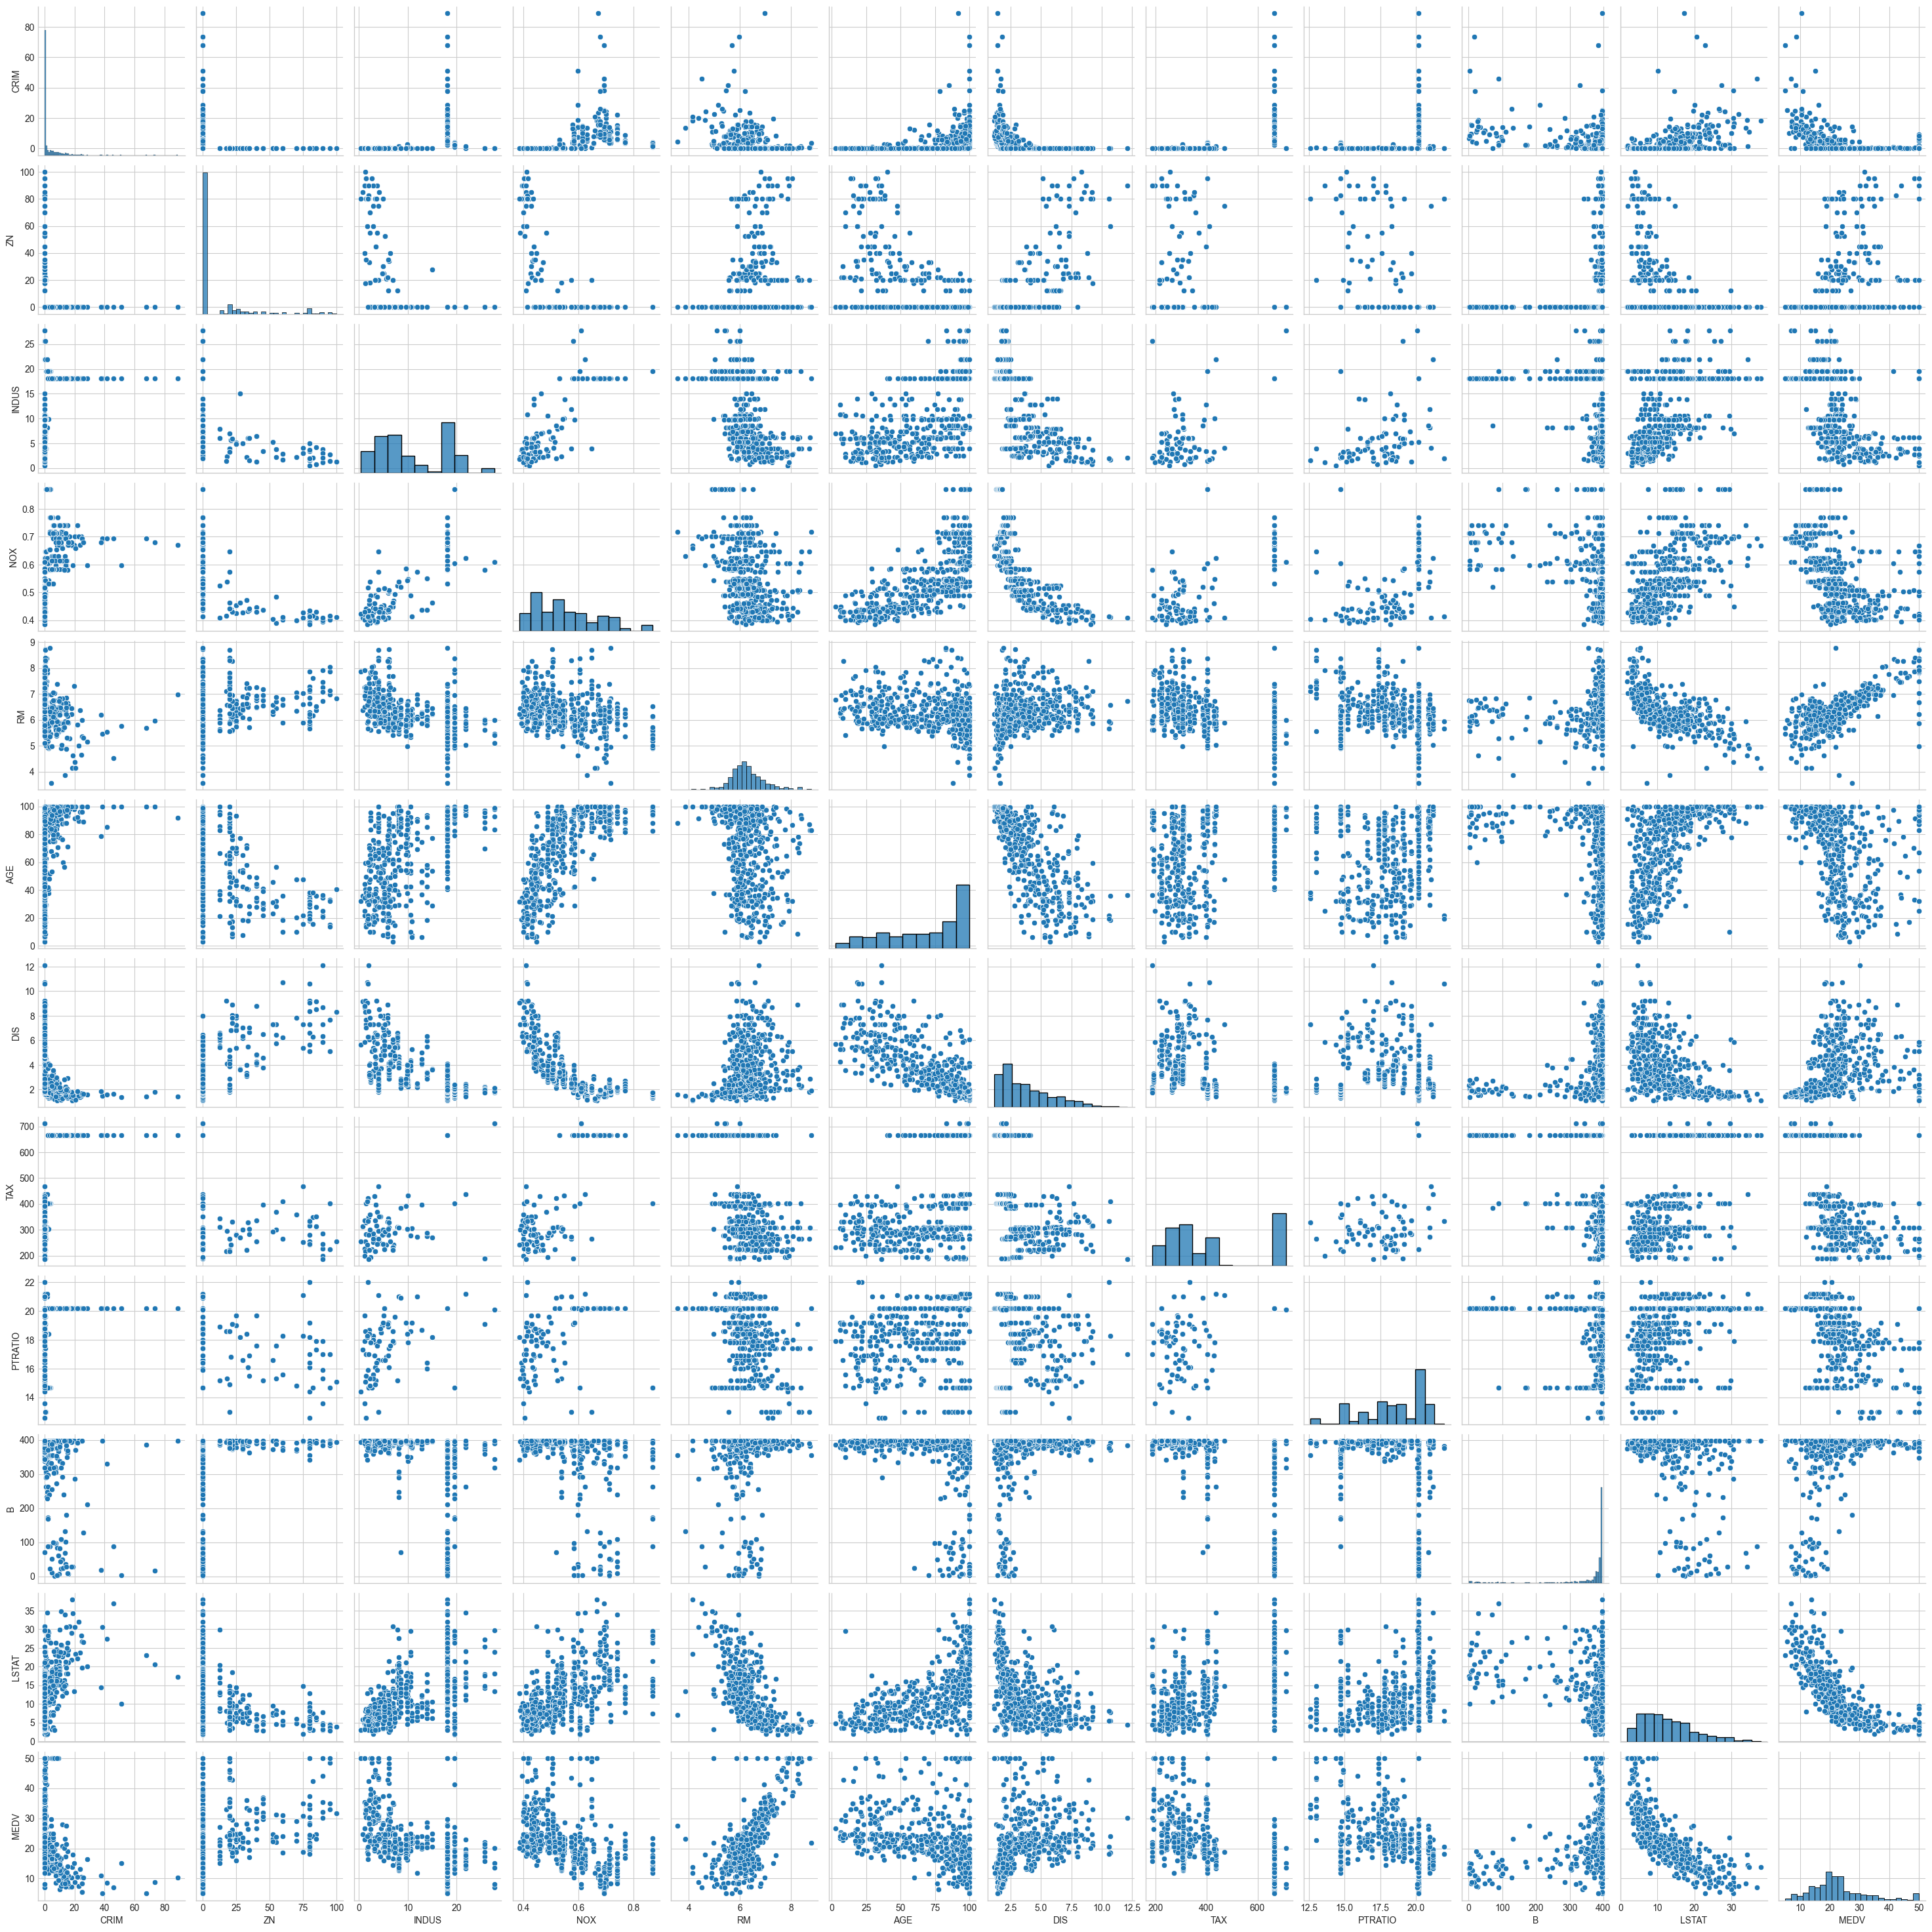

In [13]:
import seaborn as sns

sns.pairplot(boston_df)

보스턴 주택 가격에 대한 선형 회귀

In [14]:
model = LinearRegression()


In [15]:
from sklearn.model_selection import train_test_split

X = boston_df.iloc[:,:-1].values
y = boston_df.iloc[:,-1].values
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
model.score(X_test,y_test)

0.673455033018506

In [18]:
model.score(X_train,y_train)

0.7526670422874238

In [30]:
from sklearn.model_selection import cross_val_score

# 교차 검증
scores = cross_val_score(model,X,y,cv=10,scoring='neg_mean_squared_error')
print("NMSE scores : " ,scores)
print(np.mean(scores))
print(np.std(scores))

NMSE scores :  [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
-34.705255944524936
45.5739992003087


회귀모델의 검증을 위한 측정 지표 결정 계수 (coefficient of determination R2) 사용

In [20]:
r2_scores = cross_val_score(model,X,y,cv=10,scoring='r2')

print(r2_scores)
print(r2_scores.mean())
print(r2_scores.std())

[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
0.20252899006055367
0.5952960169512419


In [33]:
print(f"y = {model.intercept_}")
for i,x in enumerate(model.coef_) :
    print(f"{x} * x{i} + {model.intercept_}")

y = 39.15782873226797
-0.11861513439616007 * x0 + 39.15782873226797
0.04944360047286918 * x1 + 39.15782873226797
0.015008806055973666 * x2 + 39.15782873226797
2.6145339330403496 * x3 + 39.15782873226797
-17.36016658274118 * x4 + 39.15782873226797
3.4201097028814624 * x5 + 39.15782873226797
0.00899029819435021 * x6 + 39.15782873226797
-1.5498691814365493 * x7 + 39.15782873226797
0.32256748722518175 * x8 + 39.15782873226797
-0.012498529738724715 * x9 + 39.15782873226797
-0.9574943864208857 * x10 + 39.15782873226797
0.009717108666147504 * x11 + 39.15782873226797
-0.6028513979448711 * x12 + 39.15782873226797


In [22]:
model.coef_

array([-1.18615134e-01,  4.94436005e-02,  1.50088061e-02,  2.61453393e+00,
       -1.73601666e+01,  3.42010970e+00,  8.99029819e-03, -1.54986918e+00,
        3.22567487e-01, -1.24985297e-02, -9.57494386e-01,  9.71710867e-03,
       -6.02851398e-01])

In [23]:
model.intercept_

39.15782873226797

In [24]:
X.shape

(506, 13)

In [25]:
y.shape

(506,)

In [38]:
from sklearn.metrics import mean_squared_error , r2_score

y_train_predict=model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))
# 훈련값과 예측값 비교해서 오차측정
r2 = r2_score(y_train,y_train_predict)

print("RSME : ", rmse) # 낮으면 좋음
print("R2 score : ",r2) # 높으면 좋음

RSME :  4.639739640839623
R2 score :  0.7526670422874238


In [40]:
from sklearn.metrics import mean_squared_error , r2_score

y_test_predict = model.predict(X_test)
rmse = mean_squared_error(y_test,y_test_predict)
r2 = r2_score(y_test,y_test_predict)

print(rmse)
print(r2)

24.177131986150908
0.673455033018506


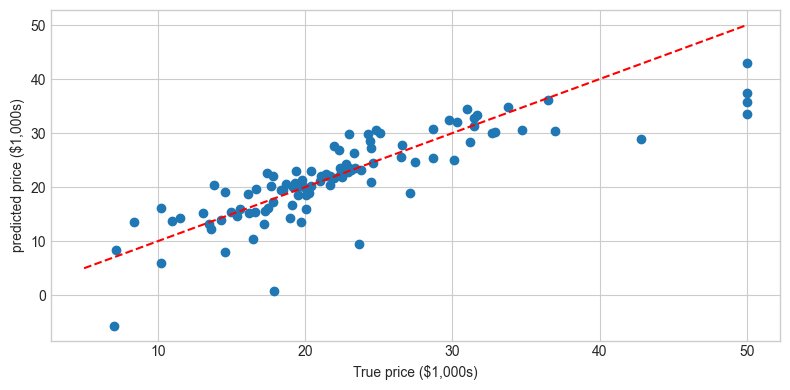

In [41]:
def plot_boston_prices(expected,predicted) :
    plt.figure(figsize=(8,4))
    plt.scatter(expected,predicted)
    plt.plot([5,50],[5,50],'--r')
    plt.xlabel('True price ($1,000s)')
    plt.ylabel('predicted price ($1,000s)')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected,predicted)

In [43]:
from sklearn.datasets import fetch_california_housing

california=fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($10

In [47]:
import pandas as pd

california_df = pd.DataFrame(california.data,columns = california.feature_names)
california_df['Target'] = california.target
california_df.head()


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [48]:
california_df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

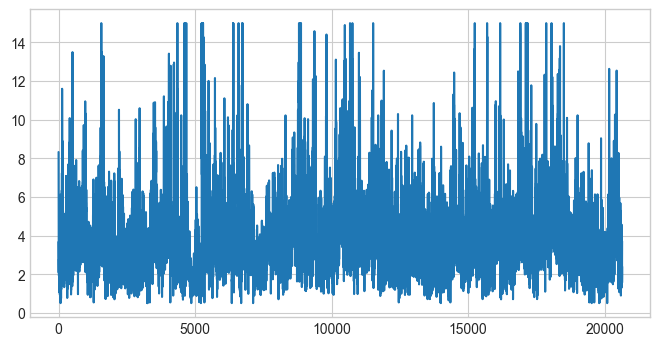

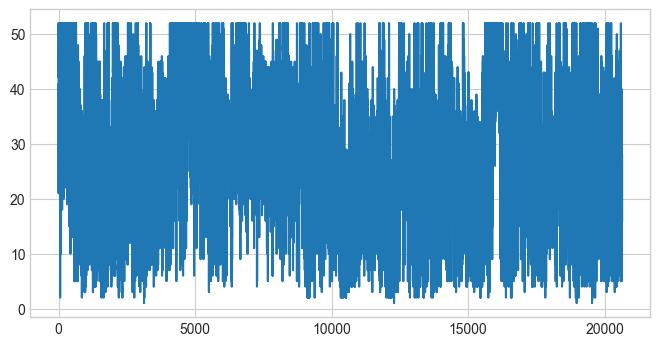

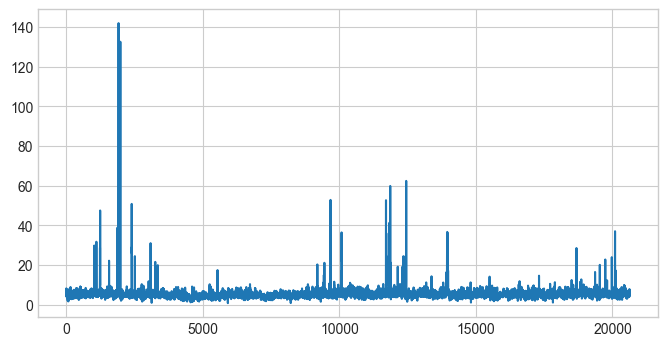

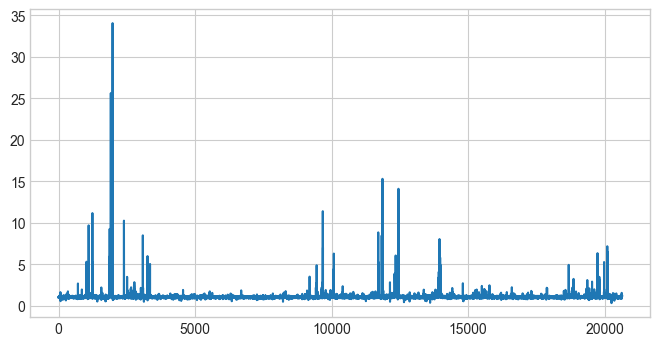

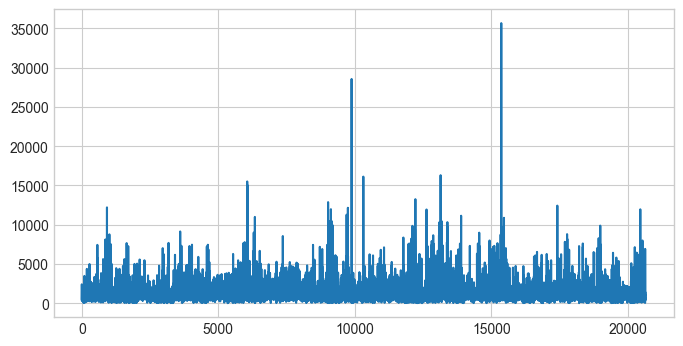

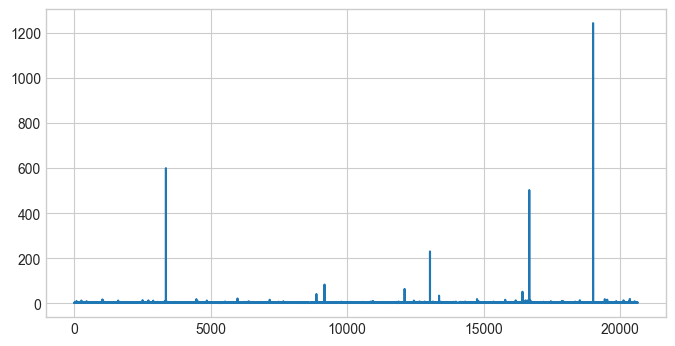

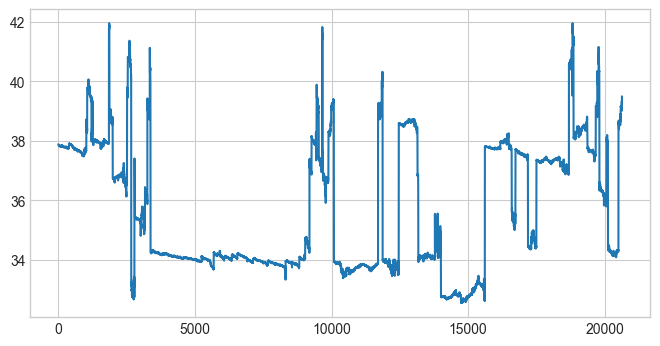

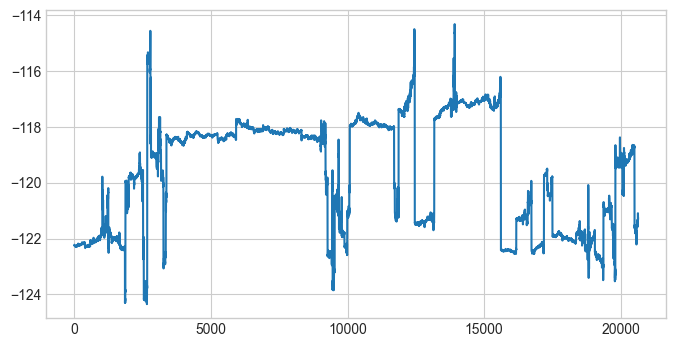

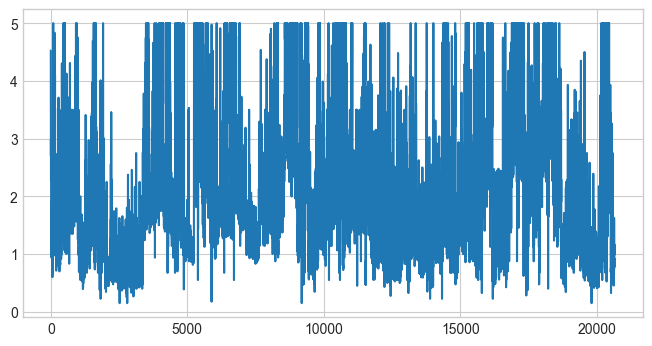

In [50]:
import matplotlib.pyplot as plt

for i,col in enumerate(california_df.columns) :
    plt.figure(figsize=(8,4))
    plt.plot(california_df[col])

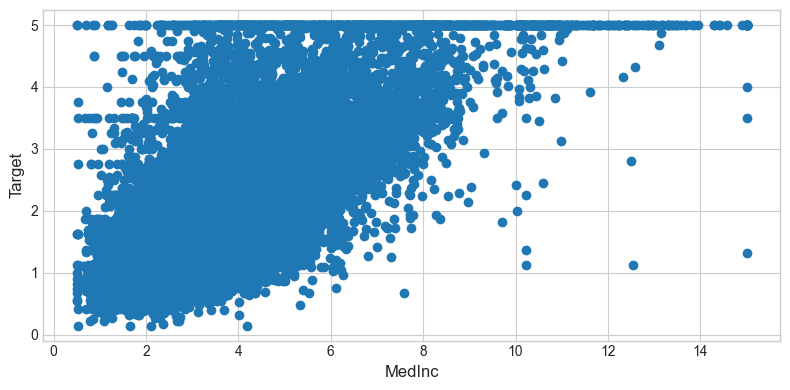

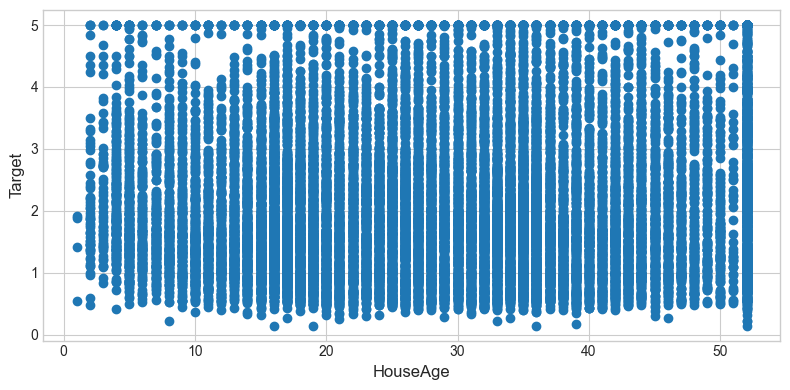

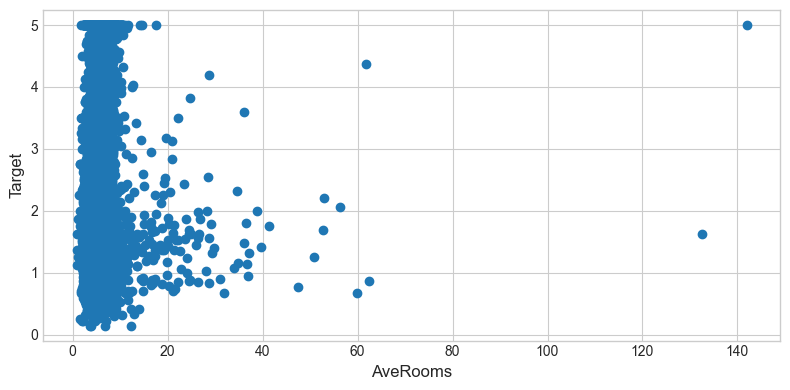

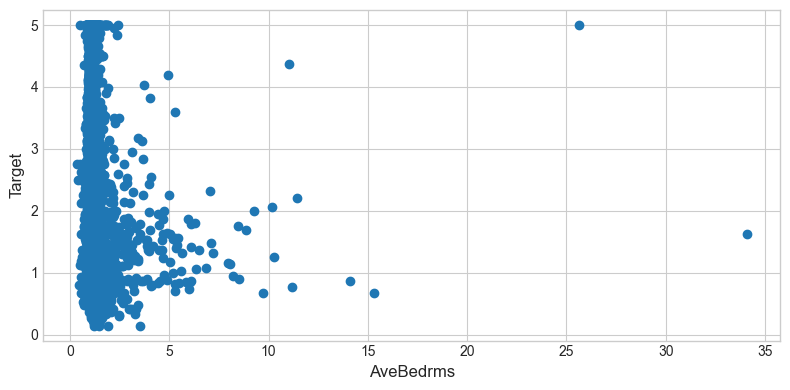

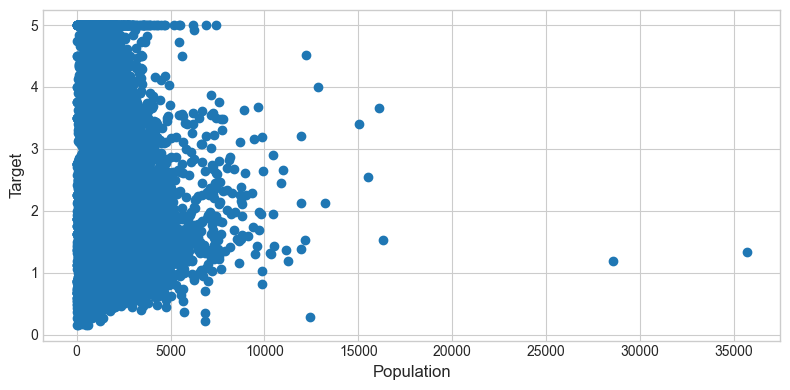

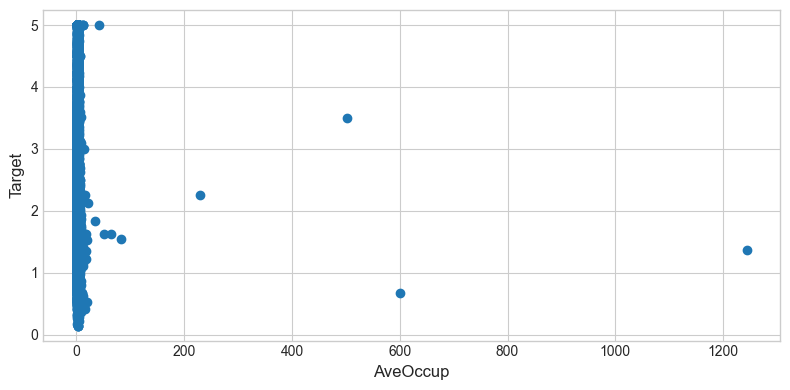

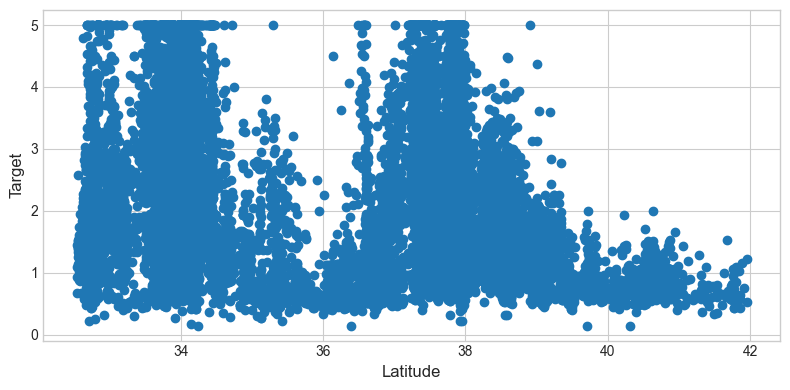

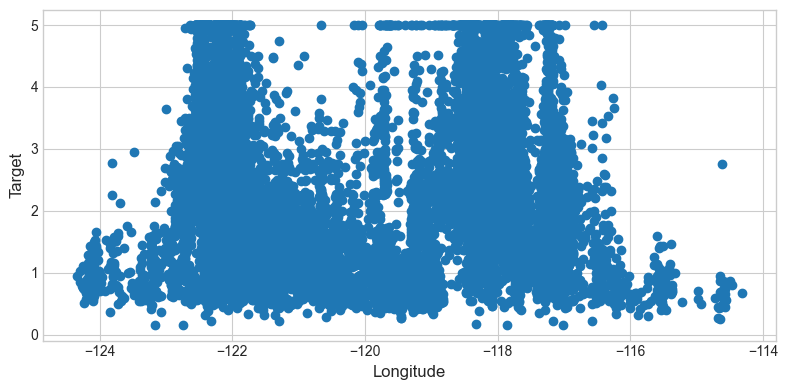

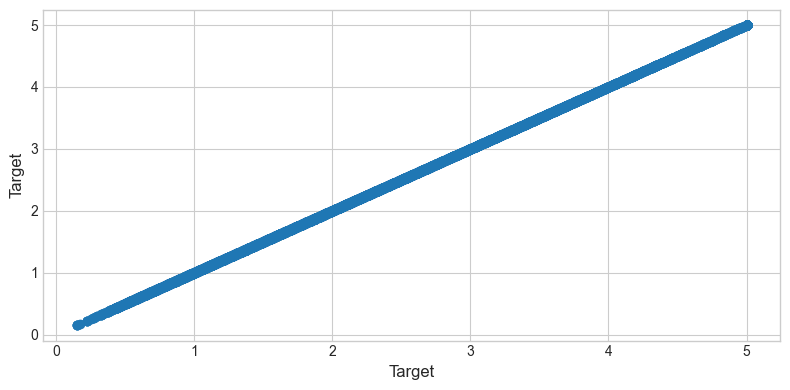

In [53]:
for i,col in enumerate(california_df.columns) :
    plt.figure(figsize=(8,4))
    plt.scatter(california_df[col],california_df['Target'])
    plt.ylabel('Target',size=12)
    plt.xlabel(col,size=12)
    plt.tight_layout()

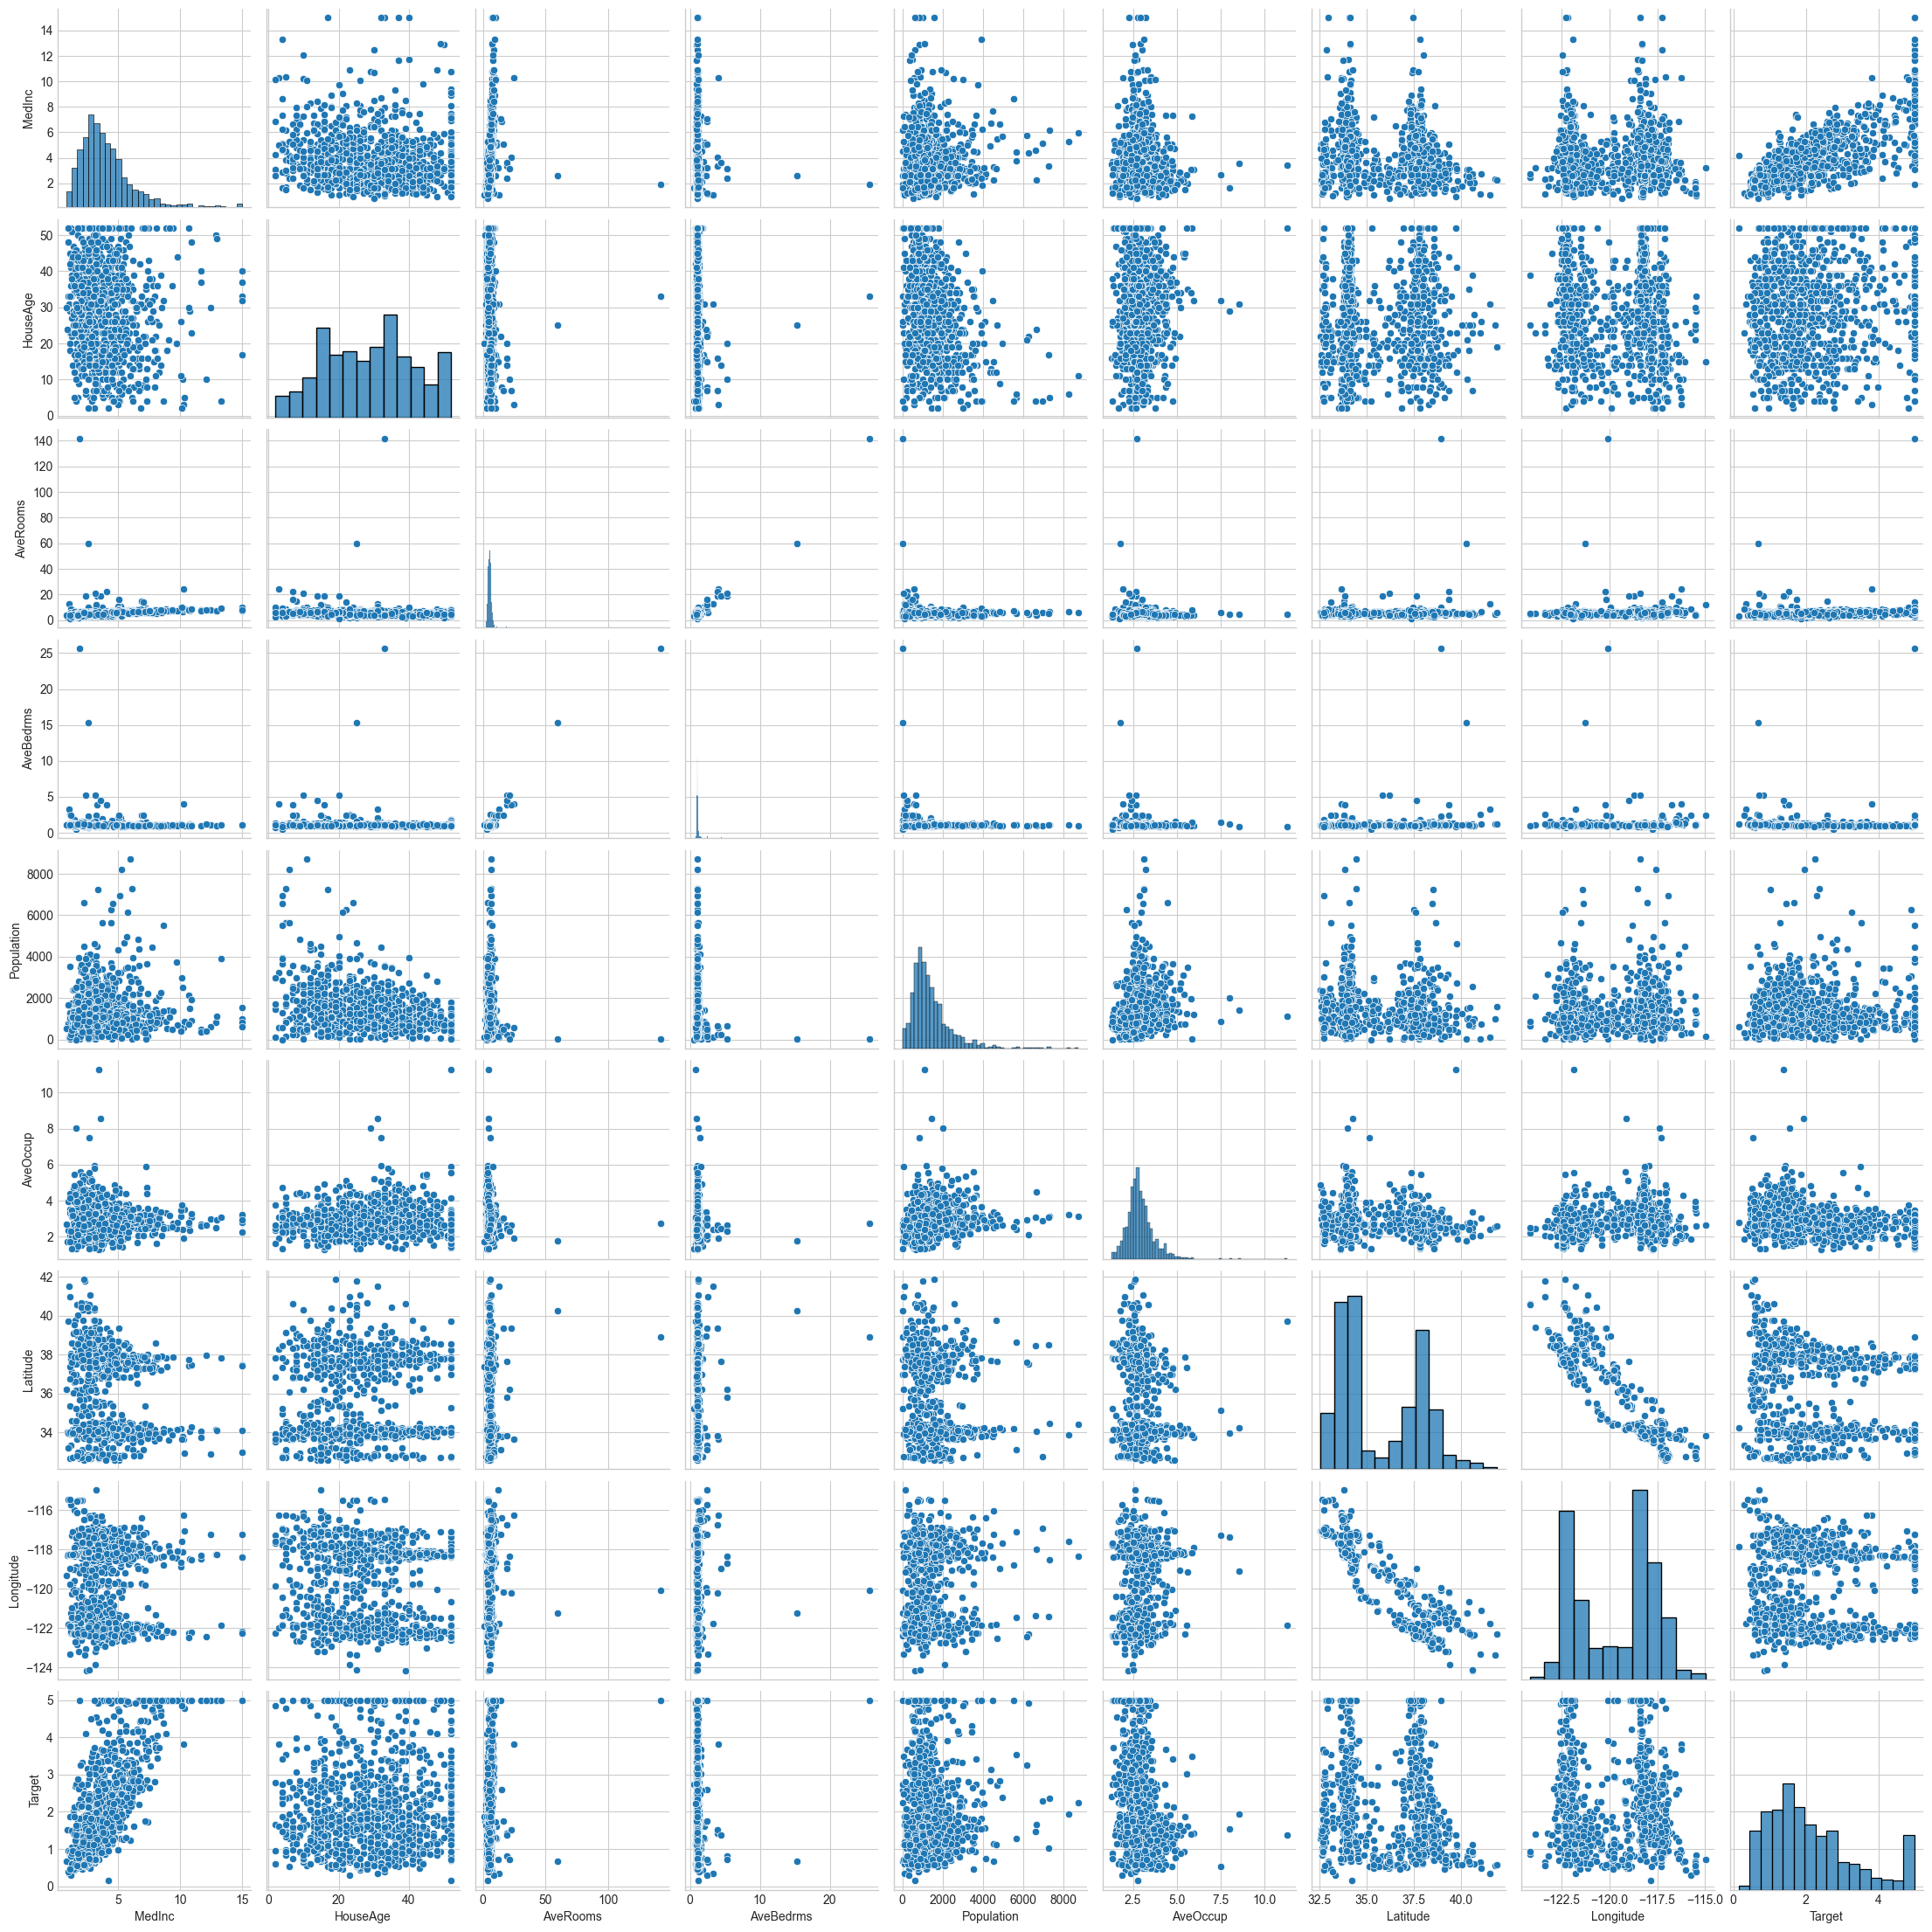

In [54]:
import seaborn as sns

sns.pairplot(california_df.sample(1000))

<Axes: xlabel='Longitude', ylabel='Latitude'>

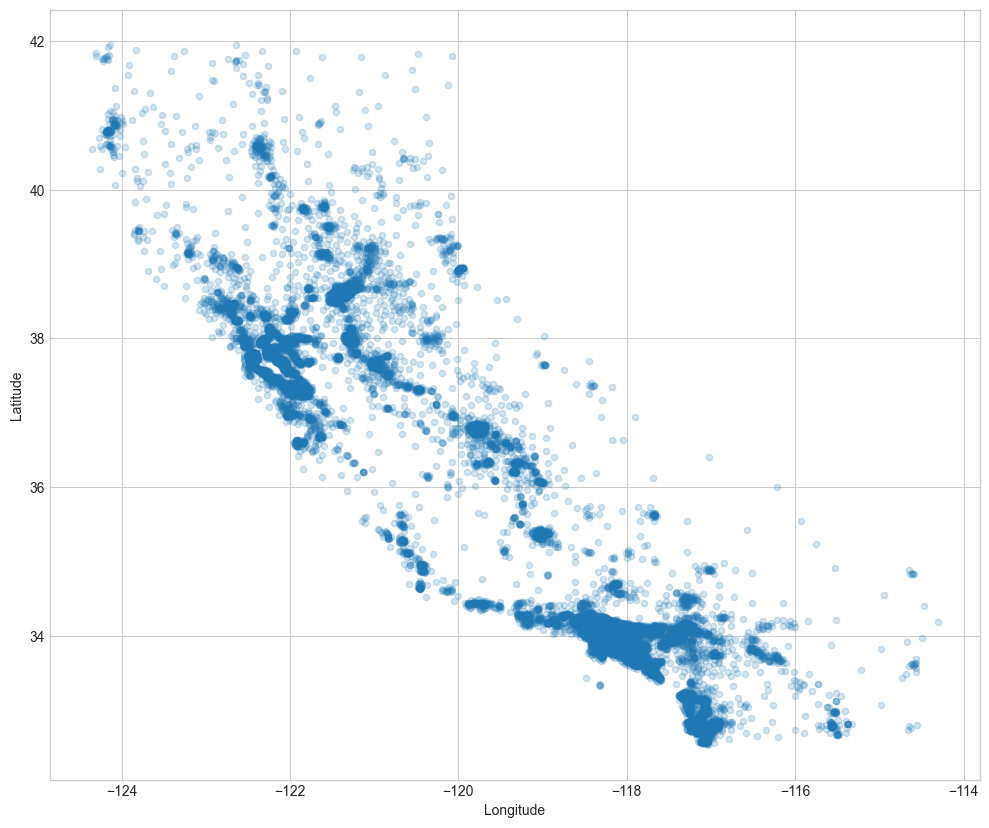

In [56]:
california_df.plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.2,figsize=(12,10))

<Axes: xlabel='Longitude', ylabel='Latitude'>

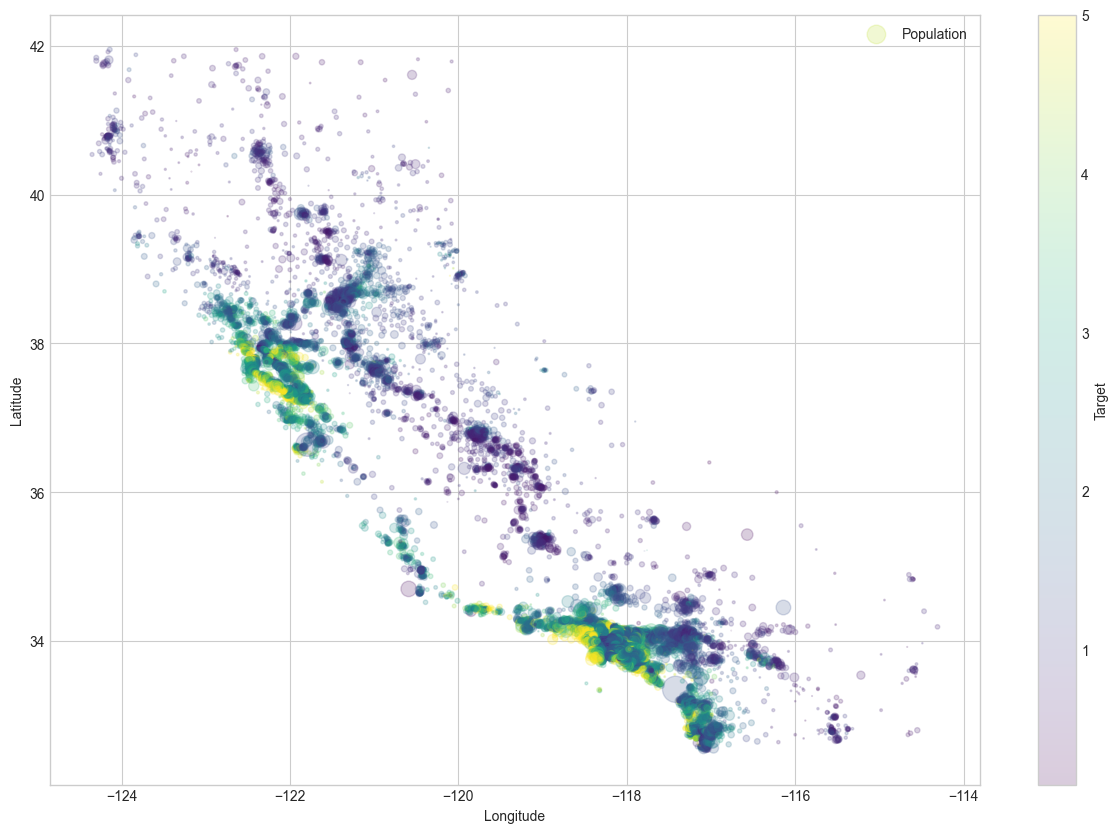

In [57]:
california_df.plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.2,
                   s=california_df['Population']/100,label="Population",figsize=(15,10),
                   c='Target',cmap=plt.get_cmap('viridis'),colorbar=True)

In [63]:
model = LinearRegression()

X_train , X_test,y_train,y_test = train_test_split(california.data,california.target,test_size=0.2)

model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

scores = cross_val_score(model,california.data,california.target,cv=10,scoring='neg_mean_squared_error')
print(scores.mean())
print(scores.std())

r2_scores = cross_val_score(model,california.data,california.target,cv=10,scoring='r2')
print(r2_scores.mean())


0.6091695677711126
0.6054026793324465
-0.5509524296956632
0.19288582953865172
0.5110068610523778


In [70]:
print("y = " + str(model.intercept_))
for i,x in enumerate(model.coef_) :
    print(f"{x} * x{i}")

y = -36.56809296090803
0.43992080962302477 * x0
0.00914023938751101 * x1
-0.10794771667249456 * x2
0.6382820576746723 * x3
-5.7045135787373025e-06 * x4
-0.0034525394536009356 * x5
-0.41439519670506414 * x6
-0.4294094127675004 * x7


In [74]:
y_train_predict = model.predict(X_train)
rmse = mean_squared_error(y_train,y_train_predict,squared=False)
r2 = r2_score(y_train,y_train_predict)

print(rmse)
print(r2)

0.725945038661626
0.6054026793324465


C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [75]:
y_test_predict = model.predict(X_test)
rmse = mean_squared_error(y_test,y_test_predict,squared=False)
r2 = r2_score(y_test,y_test_predict)

print(rmse)
print(r2)

0.7170534254666873
0.6091695677711126


C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


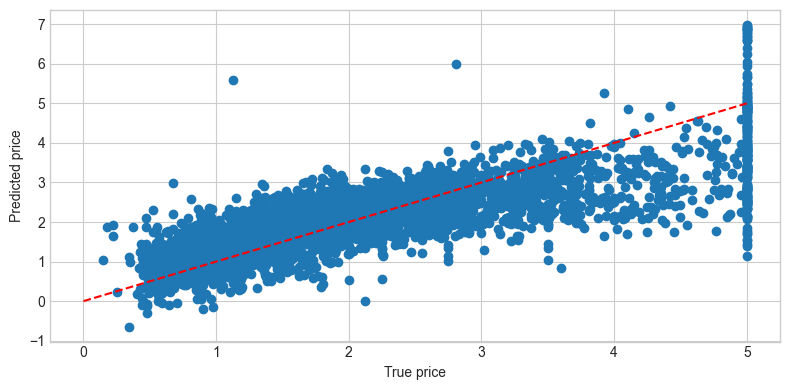

In [77]:
def plot_california_prices (expected,predicted) :
    plt.figure(figsize=(8,4))
    plt.scatter(expected,predicted)
    plt.plot([0,5],[0,5],'--r')
    plt.xlabel('True price')
    plt.ylabel('Predicted price')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected,predicted)




# 릿지 회귀 (Ridge Regression)

선형 회귀를 개선한 선형 모델 

가중치의 절대값을 최대한 작게 만든다는 것이 다름

RidgeMSE 사용

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge

In [98]:
boston_df = pd.DataFrame(X)

In [46]:
X_train, X_test, y_train, y_test =train_test_split(boston_df.iloc[:,:-1].values,boston_df.iloc[:,-1].values)

In [53]:
model =Ridge(alpha=0.2)
model.fit(X_train,y_train)

Ridge(alpha=0.2)

In [54]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7472486374564897
0.7098729458062988


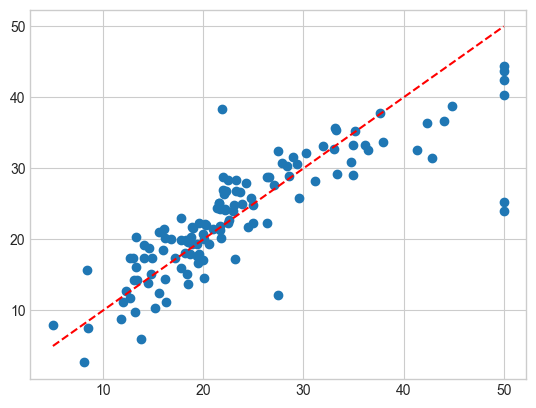

In [58]:
predicted = model.predict(X_test)
expected = y_test

plt.scatter(expected,predicted)
plt.plot([5,50],[5,50],'--r')

In [59]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train,X_test,y_train,y_test = train_test_split(california.data,california.target,test_size=0.2)


In [69]:
model = Ridge(alpha=0.2)
model.fit(X_train,y_train)

Ridge(alpha=0.2)

In [70]:
print('학습 데이터 점수',model.score(X_train,y_train))
print('평가 데이터 점수',model.score(X_test,y_test))


학습 데이터 점수 0.604680244839392
평가 데이터 점수 0.6122503242258254


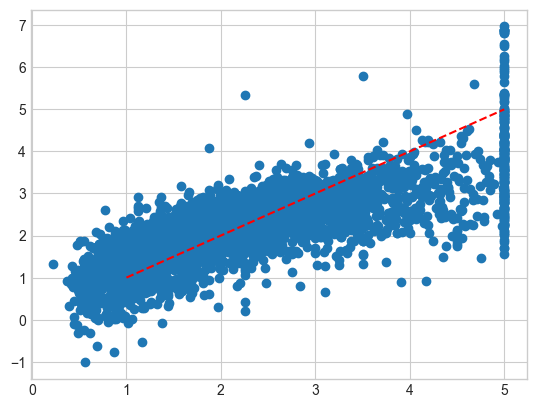

In [74]:
predicted = model.predict(X_test)
expected = y_test
plt.scatter(expected,predicted)
plt.plot([1,5],[1,5],'--r')

In [75]:
from sklearn.linear_model import Lasso 

In [110]:
X

CRIM    ZN  INDUS CHAS    NOX  ...    TAX  PTRATIO       B LSTAT  MEDV
0    0.00632  18.0   2.31    0  0.538  ...  296.0     15.3  396.90  4.98  24.0
1    0.02731   0.0   7.07    0  0.469  ...  242.0     17.8  396.90  9.14  21.6
2    0.02729   0.0   7.07    0  0.469  ...  242.0     17.8  392.83  4.03  34.7
3    0.03237   0.0   2.18    0  0.458  ...  222.0     18.7  394.63  2.94  33.4
4    0.06905   0.0   2.18    0  0.458  ...  222.0     18.7  396.90  5.33  36.2
..       ...   ...    ...  ...    ...  ...    ...      ...     ...   ...   ...
501  0.06263   0.0  11.93    0  0.573  ...  273.0     21.0  391.99  9.67  22.4
502  0.04527   0.0  11.93    0  0.573  ...  273.0     21.0  396.90  9.08  20.6
503  0.06076   0.0  11.93    0  0.573  ...  273.0     21.0  396.90  5.64  23.9
504  0.10959   0.0  11.93    0  0.573  ...  273.0     21.0  393.45  6.48  22.0
505  0.04741   0.0  11.93    0  0.573  ...  273.0     21.0  396.90  7.88  11.9

[506 rows x 14 columns]

In [124]:
X_train,X_test,y_train,y_test = train_test_split(boston_df.iloc[:,:-1].values,boston_df.iloc[:,-1].values)


In [118]:
X_train.shape

(379, 14)

In [119]:
y_train.shape

(379,)

In [125]:
model = Lasso(alpha=0.001)
model.fit(X_train,y_train)

Lasso(alpha=0.001)

In [126]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.729589298929055
0.7666746338729182


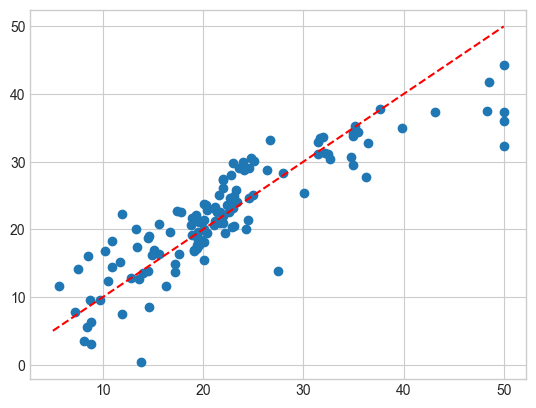

In [128]:
predicted = model.predict(X_test)
expected = y_test
plt.scatter(expected,predicted)
plt.plot([5,50],[5,50],'--r')


In [130]:
from sklearn.linear_model import Lasso

In [129]:
california = fetch_california_housing()
X_train,X_test,y_train,y_test = train_test_split(california.data,california.target,test_size=0.2)


In [131]:
model = Lasso(alpha=0.2)
model.fit(X_train,y_train)

Lasso(alpha=0.2)

In [133]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.5026048048690002
0.5115186468805786


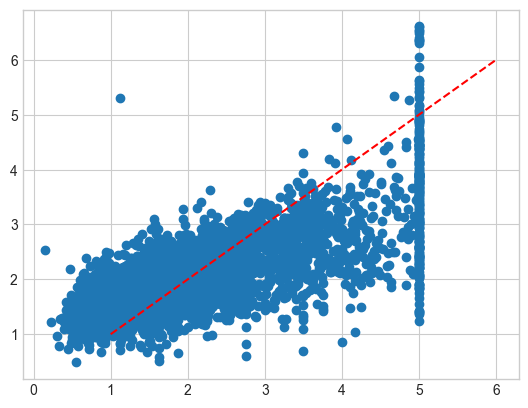

In [137]:
plt.scatter(y_test,model.predict(X_test))
plt.plot([1,6],[1,6],'--r')

신축망 (Elastic-Net)

릿지 회귀와 라쏘 회귀 , 두 모델의 모든 규제를 사용하는 선형 모델

두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보인다.

In [138]:
from sklearn.linear_model import ElasticNet

In [140]:
X_train,X_test,y_train,y_test = train_test_split(boston_df.iloc[:,:-1].values,boston_df.iloc[:,-1].values)

In [143]:
model = ElasticNet(alpha=0.01,l1_ratio=0.5)
model.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [145]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7426222421675583
0.7083703215596246


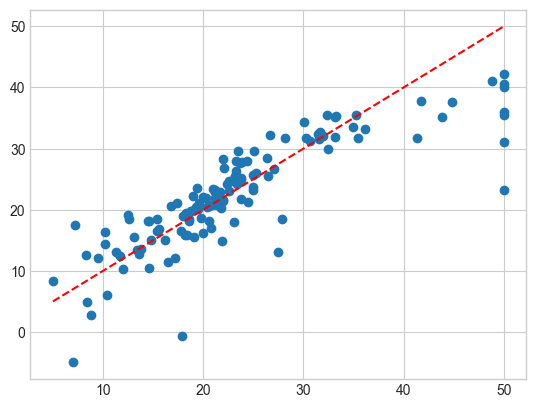

In [146]:
plt.scatter(y_test,model.predict(X_test))
plt.plot([5,50],[5,50],'--r')

직교 정합 추구 (Orthogonal Matchin Pursuit)

모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법

파라미터 w 를 찾는 것이 목표

In [147]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [150]:
X_train,X_test,y_train,y_test = train_test_split(boston_df.iloc[:,:-1].values,boston_df.iloc[:,-1].values)

In [162]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=9)
model.fit(X_train,y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=9)

In [163]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.66276115366349
0.7070338303073489


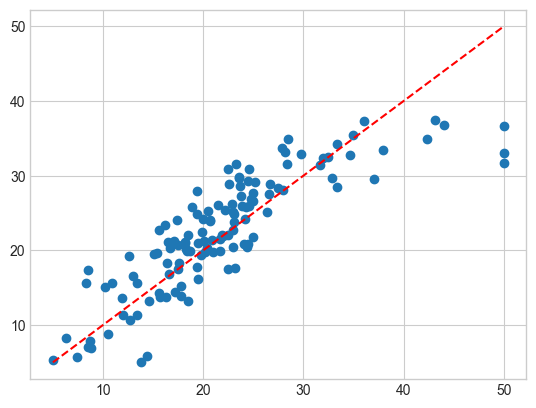

In [164]:
plt.scatter(y_test,model.predict(X_test))
plt.plot([5,50],[5,50],'--r')

In [166]:
model = OrthogonalMatchingPursuit(tol=1.)
model.fit(X_train,y_train)

C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py:186: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return func(*args, **kwargs)


OrthogonalMatchingPursuit(tol=1.0)

In [167]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7326344757650691
0.7636402702889902


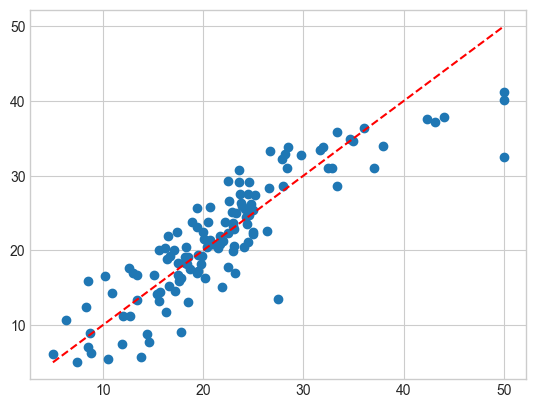

In [168]:
plt.scatter(y_test,model.predict(X_test))
plt.plot([5,50],[5,50],'--r')

다항 회귀 (Polynomial Regression)

차수가 높아질수록 더 복잡한 데이터 학습 가능

In [170]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [171]:
X_train,X_test,y_train,y_test = train_test_split(boston_df.iloc[:,:-1].values,boston_df.iloc[:,-1].values,random_state=123)


In [174]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [175]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.934678778395069
0.8257864718002391


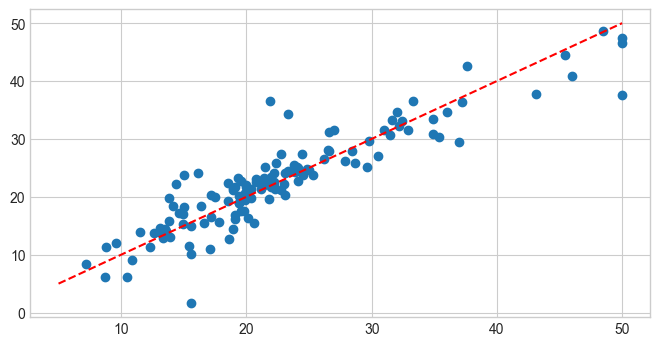

In [177]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,model.predict(X_test))
plt.plot([5,50],[5,50],'--r')

In [178]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [179]:
california = fetch_california_housing()

X_train,X_test,y_train,y_test = train_test_split(california.data,california.target,random_state=123)

In [196]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()    
)
model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [197]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.6805245247835159
0.6313778384683193


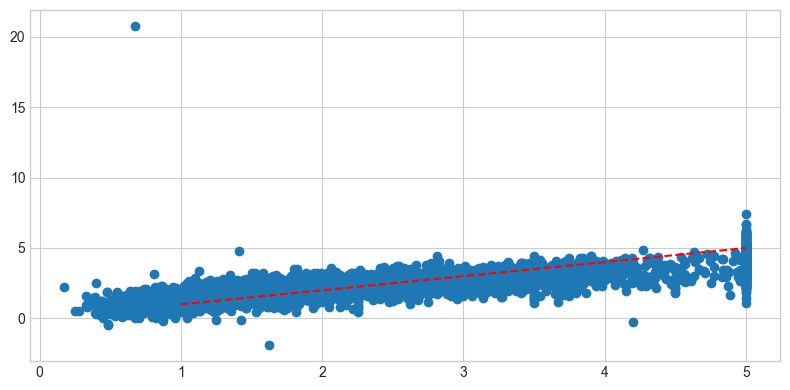

In [198]:
predicted = model.predict(X_test)
expected = y_test
plt.figure(figsize=(8,4))
plt.scatter(expected,predicted)
plt.plot([1,5],[1,5],'--r')
plt.tight_layout()